In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display
from typing import *

### 1. The statement of the interpolation problem with Cubic Spline

Given $ N $ pairs of values $\{(x_i, y_i) | x_i < x_{i+1}, y_i = f(x_i), i = 1..N\}$, define the function $ f(x) $ as

$$ f(x) = \sum_{i=1}^{N-1} \theta_i(x) $$ 
$$ \theta_i(x) = \begin{cases}
    a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3, & \text{if } x_i \le x\lt x_{i+1}\\
    0,                                                    & \text{otherwise}
\end{cases} $$

and find its parameters.

$$ \theta_i'(x) = b_i + 2c_i(x - x_i) + 3d_i(x - x_i)^2 $$

$$ \theta_i''(x) = 2c_i + 6d_i(x - x_i) $$

### 2. The functional and differential compatibility conditions

$$ \forall i=1..N-1: $$

#### Functional compatibility conditions

$$ \theta_i(x_i) - f(x_i) = 0 $$

$$ \theta_i(x_{i+1}) - f(x_{i+1}) = 0 $$

#### Differential compatiility conditions

$$ \theta_i''(x_i) - f''(x_i) = 0 $$

$$ \theta_i''(x_{i+1}) - f''(x_{i+1}) = 0 $$


### 3. Stitching conditions

$$ \theta_i(x_{i+1}) = \theta_{i+1}(x_{i+1}) = y_{i_1}, i=1..N-1 $$

$$ \theta_i'(x_{i+1}) = \theta_{i+1}'(x_{i+1}), i=1..N-1 $$

$$ \theta_i''(x_{i+1}) = \theta_{i+1}''(x_{i+1}), i=1..N-1 $$

### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]

Stiching conditions ensure that the resulting function is continuous.

Differential compatibility conditions ensure that the resulting function is differentiable up to $r$ (2 in our case).

Functional compatibility conditions ensure that the resulting function solves the interpolation problem and passes through all grid points.

### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

#### Deriving polynomial parameters
Additional definitions:

$$ m_i = f''(x_i) $$
$$ h_i = x_i - x_{i-1} $$
$$ \Delta m_i = m_{i+1} - m_i $$
$$ \Delta f_i = f(x_{i+1}) - f(x_i) = y_{i+1} - y_i $$

Differential conditions:

$$ \theta_i(x_i) - f(x_i) = 0 $$
$$ \theta_i(x_{i+1}) - f(x_{i+1}) = 0 $$
$$ \theta_i''(x_i) - f''(x_i) = 0 $$
$$ \theta_i''(x_{i+1}) - f''(x_{i+1}) = 0 $$

Substituting with our polynomial:

$$ a_i + b_i(x_i - x_i) + c_i(x_i - x_i)^2 + d_i(x _i - x_i)^3 - y_i = 0 $$
$$ a_i + b_i(x_{i+1} - x_i) + c_i(x_{i+1} - x_i)^2 + d_i(x_{i+1}- x_i)^3 - y_{i+1} = 0 $$
$$ 2c_i + 6d_i(x_i - x_i) - m_i = 0 $$
$$ 2c_i + 6d_i(x_{i+1} - x_i) - m_{i+1} = 0 $$

Simplifying 1st:

$$ a_i = y_i $$

Subtracting 4th from 3rd:

$$ 2c_i + 6d_i(x_{i+1} - x_i) - m_{i+1} - 2c_i - 6d_i(x_i - x_i) + m_i = 0$$
$$ \Delta m_i = 6d_i h_{i+1} $$
$$ d_i = \frac{\Delta m_i}{6 h_{i+1}} $$

Subtracting 3rd from 1st:

$$ a_i - y_i - 2c_i + m_i = 0 $$
$$ a_i = y_i + 2c_i - m_i $$
$$ 2c_i = m_i $$
$$ c_i = \frac{m_i}{2} $$

Subtracting 2nd from 1st:

$$ b_i(x_{i+1} - x_i) + c_i(x_{i+1} - x_i)^2 + d_i(x _{i+1}- x_i)^3 - y_{i+1} + y_i = 0 $$
$$ b_i h_{i+1} + c_i h_{i+1}^2 + d_i h_{i+1}^3 = \Delta f_i $$
$$ b_i = \frac{\Delta f_i}{h_{i+1}} - c_i h_{i+1} - d_i h_{i+1}^2 $$
$$ b_i = \frac{\Delta f_i}{h_{i+1}} - \frac{h_{i+1} m_i}{2} - \frac{\Delta m_i h_{i+1}}{6} $$

#### Deriving dependency

Stiching condition:

$$ \theta_i'(x_{i+1}) = \theta_{i+1}'(x_{i+1}) $$
$$ \theta_i'(x) = b_i + 2c_i(x - x_i) + 3d_i(x - x_i)^2 $$

Substituting with the polynomial:

$$ b_i + 2c_i(x_{i+1} - x_i) + 3d_i(x_{i+1} - x_i)^2 = b_{i+1} + 2c_{i+1}(x_{i+1} - x_{i+1}) + 3d_{i+1}(x_{i+1} - x_{i+1})^2 $$
$$ b_i + 2c_i h_{i+1} + 3d_i h_{i+1}^2 = b_{i+1} $$

Substituting the parameters:

$$ \frac{\Delta f_i}{h_{i+1}} - \frac{h_{i+1} m_i}{2} - \frac{\Delta m_i h_{i+1}}{6} + m_i h_{i+1} + \frac{\Delta m_i h_{i+1}}{2} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{h_{i+2} m_{i+1}}{2} - \frac{\Delta m_{i+1} h_{i+2}}{6} $$
$$ \frac{\Delta f_i}{h_{i+1}} + \frac{3 h_{i+1} m_i - \Delta m_i h_{i+1} + 3 \Delta m_i h_{i+1}}{6} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{3 h_{i+2} m_{i+1} + \Delta m_{i+1} h_{i+2}}{6} $$
$$ \frac{\Delta f_i}{h_{i+1}} + \frac{h_{i+1}(3 m_i - \Delta m_i + 3 m_{i+1} - 3 m_i)}{6} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{3 h_{i+2} m_{i+1} + \Delta m_{i+1} h_{i+2}}{6} $$
$$ \frac{h_{i+1}(3 m_{i+1} - \Delta m_i)}{6} + \frac{3 h_{i+2} m_{i+1} + \Delta m_{i+1} h_{i+2}}{6} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{\Delta f_i}{h_{i+1}} $$
$$ \frac{h_{i+1} m_{i+1}}{2} - \frac{(m_{i+1} - m_i) h_{i+1}}{6}  + \frac{h_{i+2} m_{i+1}}{2} + \frac{(m_{i+2} - m_{i+1}) h_{i+2}}{6} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{\Delta f_i}{h_{i+1}} $$
$$ \frac{h_{i+1} m_{i+1}}{3} + \frac{m_i h_{i+1}}{6}  + \frac{h_{i+2} m_{i+1}}{3} + \frac{m_{i+2} h_{i+2}}{6} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{\Delta f_i}{h_{i+1}} $$
$$ \frac{m_i h_{i+1}}{6} + \frac{(h_{i+1} + h_{i+2}) m_{i+1}}{3} + \frac{m_{i+2} h_{i+2}}{6} = \frac{\Delta f_{i+1}}{h_{i+2}} - \frac{\Delta f_i}{h_{i+1}} $$

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

$$ \frac{h_i}{6} m_{i-1} + \frac{(h_i + h_{i+1})}{3} m_i + \frac{h_{i+1}}{6} m_{i+1} = \frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_i}, \forall i = 2..{N-1} $$
$$ A_i m_{i-1} + B_i m_i + C_i m_{i+1} = F_i $$ 

$$ A_i = \frac{h_i}{6} = \frac{x_i - x_{i-1}}{6} $$
$$ B_i = \frac{h_i + h_{i+1}}{3} = \frac{x_i - x_{i-1} + x_{i+1} - x_i}{3} = \frac{x_{i+1} - x_{i-1}}{3} $$
$$ C_i = \frac{h_{i+1}}{6} = \frac{x_{i+1} - x_i}{6} $$
$$ F_i = \frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_i} = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} - \frac{y_i - y_{i-1}}{x_i - x_{i-1}} $$

$$
\begin{bmatrix}
    B_1    & C_1    & 0      & 0      & \dots   & 0 \\
    A_2    & B_2    & C_2    & 0      & \dots   & 0 \\
    0      & A_3    & B_3    & C_3    & \dots   & 0 \\
    0      & 0      & A_4    & B_4    & \dots   & 0 \\
    \vdots & \vdots & \vdots & \vdots & \ddots  & \vdots \\
    0      & 0      & 0      & \dots  & A_N    & B_N 
\end{bmatrix} \begin{bmatrix}
    m_1 \\
    m_2 \\
    m_3 \\
    m_4 \\
    \vdots \\
    m_N
\end{bmatrix} = \begin{bmatrix}
    F_1 \\
    F_2 \\
    F_3 \\
    F_4 \\
    \vdots \\
    F_N
\end{bmatrix}
$$

### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

Unknown variables are variables which are neither given in the input data nor are derivable from it. Our systems is not closed due to the unknown variables $ m_1 $ and $ m_N $. We will define them both as zeroes.

### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]
$$ \begin{bmatrix}
    1      & -P_1   & 0      & 0      & \dots     & 0      \\
    0      & 1      & -P_2   & 0      & \dots     & 0      \\
    0      & 0      & 1      & -P_3   & \dots     & 0      \\
    \vdots & \vdots & \vdots & \vdots & \ddots    & \vdots \\
    0      & 0      & 0      & 0      & \dots     & 1 
\end{bmatrix} X = \begin{bmatrix}
    Q_1 \\
    Q_2 \\
    Q_3 \\
    \vdots \\
    Q_N
\end{bmatrix} $$ 

where 
$$ P_1 = \frac{C_1}{-B_1} $$ 
$$ Q_1 = \frac{F_1}{B_1} $$ 
$$ P_i = \frac{C_i}{-B_i - A_i P_{i-1}} $$ 
$$ Q_i = \frac{A_i Q_{i-1} - F_i}{-B_i - A_i P_{i-1}} $$


### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

#### Forward pass

Given $i$th equation of form $a m_{i-1} + b m_i + c m_{i+1} = d $ and $i-1$th equation of form $ a' m_{i-1} + b' m_i = d' $, we can derive another equation:

$$ a a' m_{i-1} + b a' m_i + c a' m_{i+1} - a a' m_{i-1} - a b' m_i = d a' - a d' $$
$$ (b a' - a b') m_i + c a' m_{i+1} = d a' - a d' $$

The very first equation already has only two variables, so we start with $ i = 2 $ 

The last equation's $ c = 0 $, as a result it will have only one variable.

#### Reverse pass

Given $i$th equation of form $a m_i + b m_{i+1} = d $ and $i+1$th equation of form $ b' m_{i+1} = d' $, we can derive following equation:

$$ a b' m_i + b b' m_{i+1} - b b' m_{i+1} = d b' - d' b $$
$$ a b' m_i = d b' - d' b $$
$$ m_i = \frac{d b' - d' b}{a b'} $$

### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

$$ A_i = \frac{x_i - x_{i-1}}{6} $$
$$ B_i = \frac{x_{i+1} - x_{i-1}}{3} $$
$$ C_i = \frac{x_{i+1} - x_i}{6} $$
$$ F_i = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} - \frac{y_i - y_{i-1}}{x_i - x_{i-1}} $$

Forward:
$$ (b a' - a b') m_i + c a' m_{i+1} = d a' - a d' $$

Backward:
$$ m_i = \frac{d b' - d' b}{a b'} $$

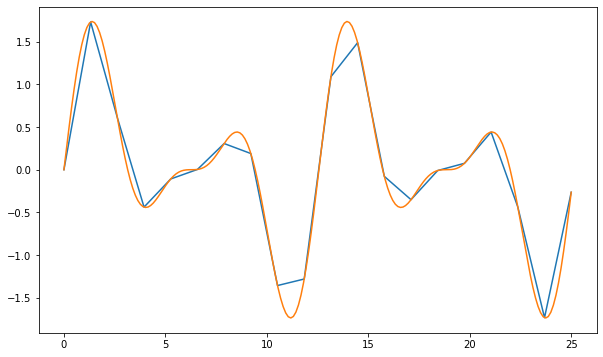

In [2]:
plt.rcParams['figure.figsize'] = [10, 6]

def gen_func() -> np.ndarray:
    def func(x: np.ndarray) -> np.ndarray:
        return np.sin(x) * (np.cos(x / 2) + 1)
    
    x = np.linspace(0, 25, 20)
    y = func(x)
    plt.plot(x, y)
    values = np.stack([x, y])
    # draw a more detailed plot
    x = np.linspace(0, 25, 200)
    y = func(x)
    plt.plot(x, y)
    plt.show()
    return values
    
values = gen_func()

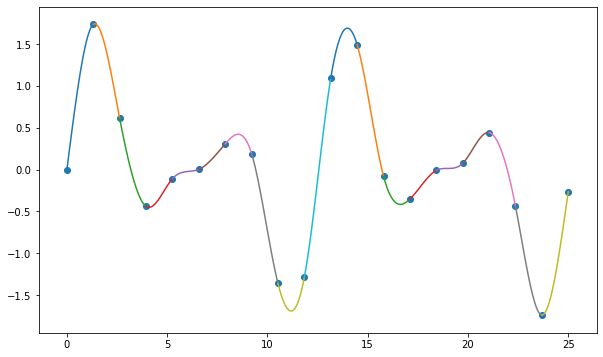

In [3]:
def solve(pairs: np.ndarray) -> np.ndarray:
    ac = (pairs[0, 1:] - pairs[0, :-1]) / 6  # A and C diagonals are actually the same
    b = (pairs[0, 2:] - pairs[0, :-2]) / 3  # B diagonal
    # the result vector
    f = (pairs[1, 2:] - pairs[1, 1:-1]) / (pairs[0, 2:] - pairs[0, 1:-1])
    f -= (pairs[1, 1:-1] - pairs[1, :-2]) / (pairs[0, 1:-1] - pairs[0, :-2])
    matrix = np.stack([ac[:-1], b, ac[1:], f])
    matrix[0, 0] = matrix[2, -1] = 0  # set top-left and bottom right cells to 0 because m_0 = m_N = 0 
    # forward pass
    for i in range(1, matrix.shape[1]):
        prev = matrix[:, i - 1]
        curr = matrix[:, i]
        matrix[:, i] = np.array([
            0,
            curr[1] * prev[1] - curr[0] * prev[2],
            curr[2] * prev[1],
            curr[3] * prev[1] - curr[0] * prev[3],
        ])
    # backwards pass
    matrix[:, -1] = np.array([0, 1, 0, matrix[3, -1] / matrix[1, -1]])
    for i in range(matrix.shape[1] - 2, -1, -1):
        curr = matrix[:, i]
        nuxt = matrix[:, i + 1]
        matrix[:, i] = np.array([
            0,
            1,
            0,
            (curr[3] * nuxt[1] - nuxt[3] * curr[2]) / (curr[1] * nuxt[1]),
        ])
    m = np.concatenate([[0], matrix[3], [0]])  # add zeros at start and end because m_0 = m_N = 0
    # find polynomial coefficients
    a = values[1, :-1]
    c = m[:-1] / 2
    d = (m[1:] - m[:-1]) / (values[0, 1:] - values[0, :-1]) / 6
    b = (values[1, 1:] - values[1, :-1]) / (values[0, 1:] - values[0, :-1])
    b -= (values[0, 1:] - values[0, :-1]) * m[:-1] / 2
    b -= (values[0, 1:] - values[0, :-1]) * (m[1:] - m[:-1]) / 6
    return np.stack([a, b, c, d])

params = solve(values)

def print_spline(coefs: np.ndarray, x1: int, x2: int):
    xs = np.linspace(0, x2 - x1, 100)
    ys = np.polyval(np.flip(coefs), xs)
    plt.plot(xs + x1, ys)
    
for i in range(params.shape[1]):
    print_spline(params[:, i], values[0, i], values[0, i + 1])



plt.scatter(values[0], values[1])
plt.show()

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

Calculating splines parameters:

Forward pass: O(n)

Backward pass: O(n)

O(n) + O(n) = O(n)


Calculating the function value at a particular point:

Finding the necessary spline: O(log n) -- binary search

Polynomial calculation: O(1)

O(log n) + O(1) = O(log n)

### Congrats!

Thanks